In [6]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [8]:
ims=search_images_ddg('grizzly bear')
print(ims[0])
len(ims)

http://2.bp.blogspot.com/_VgXaDXiFvX4/TOLczEIDrsI/AAAAAAAAA9Q/2-gD8-Wg9F0/s1600/Gizzly+bear+3.jpg


200

In [9]:
dest='image/grizzly.jpg'
download_url(ims[0],dest)

Path('image/grizzly.jpg')

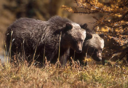

In [10]:
im=Image.open(dest)
im.to_thumb(128,128)

In [11]:
bear_types='grizzly','black','teddy'
path=Path('bear')

In [12]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        print(dest)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')        
        download_images(dest,urls=results)

bear/grizzly
bear/black
bear/teddy


In [13]:
fns=get_image_files(path)
fns

(#575) [Path('bear/black/3ecf8ccc-4529-4aa0-9e83-a82833d14ed1.JPG'),Path('bear/black/a68b5e83-b1a6-4949-b17a-6e5c1c0eb693.jpg'),Path('bear/black/bd9d1498-03d1-4511-ae16-b74229ecdb56.jpg'),Path('bear/black/4f304210-9cfd-4215-8bfc-0164c5611ef9.jpg'),Path('bear/black/066dda36-4a90-4420-85fe-ee27b9512690.jpg'),Path('bear/black/928d83d4-0873-4636-86a9-6f6a66bf4a11.jpg'),Path('bear/black/5b06b15c-ce3b-4c5e-9154-a0ccfbd49f00.jpg'),Path('bear/black/80865b41-f44d-45d9-9ab9-89d69d3dc0ea.jpg'),Path('bear/black/e6de35fd-e7d9-45d5-9f6d-ea63ab9a2398.jpg'),Path('bear/black/5416d88e-6cac-4eaa-8814-c3adf80a4aac.jpg')...]

In [14]:
failed=verify_images(fns)
failed

(#20) [Path('bear/black/a1b8e811-91be-4bd6-bffe-f797e9925b0c.jpg'),Path('bear/black/fd1f1bb1-d368-4dd4-bedf-77d65ae2aa87.jpg'),Path('bear/black/e1493a3e-6e6b-4d70-84d6-8f34154e2481.jpg'),Path('bear/black/171cb037-a904-419b-871e-351b754bed02.jpg'),Path('bear/teddy/d480e092-be82-4b38-91e2-e6d2d06d835e.JPG'),Path('bear/teddy/a12011fa-a727-4762-bd5a-772a3103457d.JPG'),Path('bear/teddy/e7933f40-56ab-44b7-acdb-766d3e42a1dc.jpg'),Path('bear/teddy/df043517-64f9-4dbd-a868-ac517969a259.png'),Path('bear/teddy/6198ec02-744e-49fc-a89d-7dac0e1a3483.jpg'),Path('bear/teddy/009092f4-f8e6-411f-91a1-c7de6b80adc9.JPG')...]

In [15]:
failed.map(Path.unlink);

In [16]:
??verify_images

Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)
File:      /opt/conda/lib/python3.10/site-packages/fastai/vision/utils.py
Type:      function

In [17]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

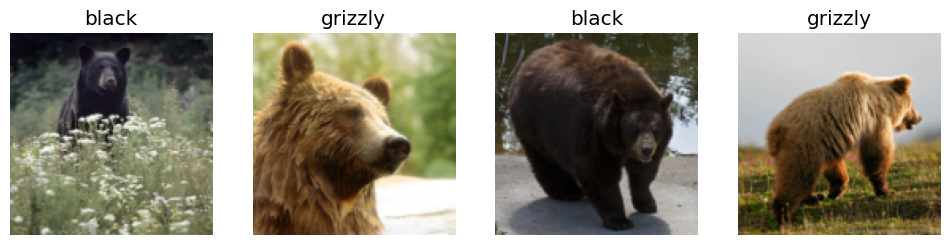

In [18]:
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

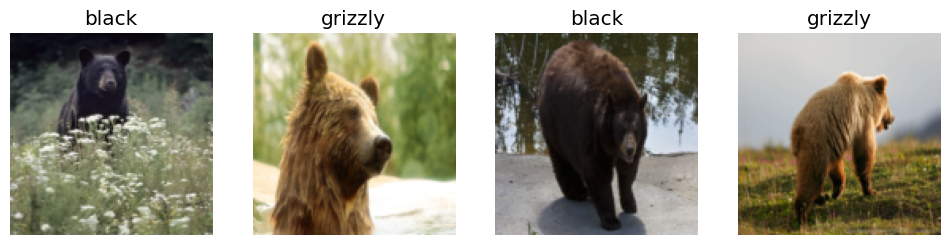

In [19]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

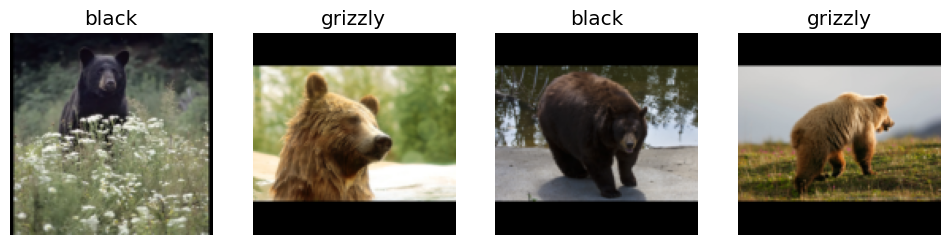

In [20]:
bears = bears.new(item_tfms=Resize(128,ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

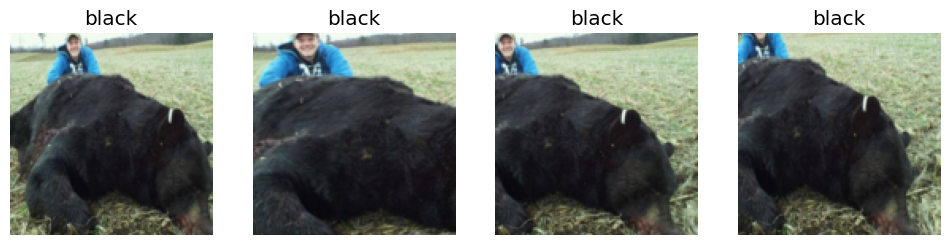

In [21]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

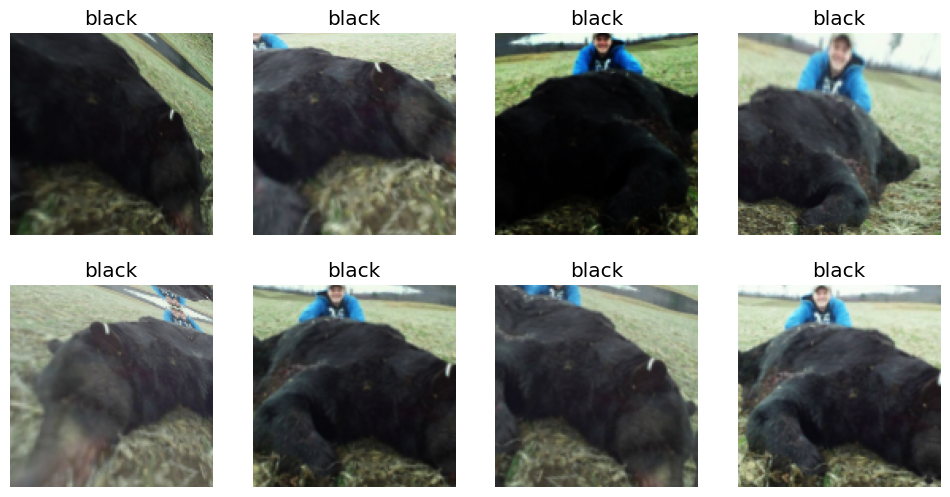

In [22]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [23]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [24]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(4)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 35.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.925278,0.154996,0.054054,00:30


epoch,train_loss,valid_loss,error_rate,time
0,0.225240,0.156950,0.045045,00:28
1,0.225831,0.213153,0.045045,00:26
2,0.181485,0.244305,0.045045,00:26
3,0.165730,0.243533,0.045045,00:26


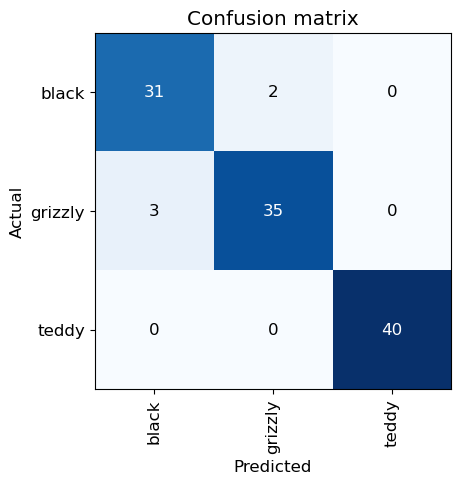

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

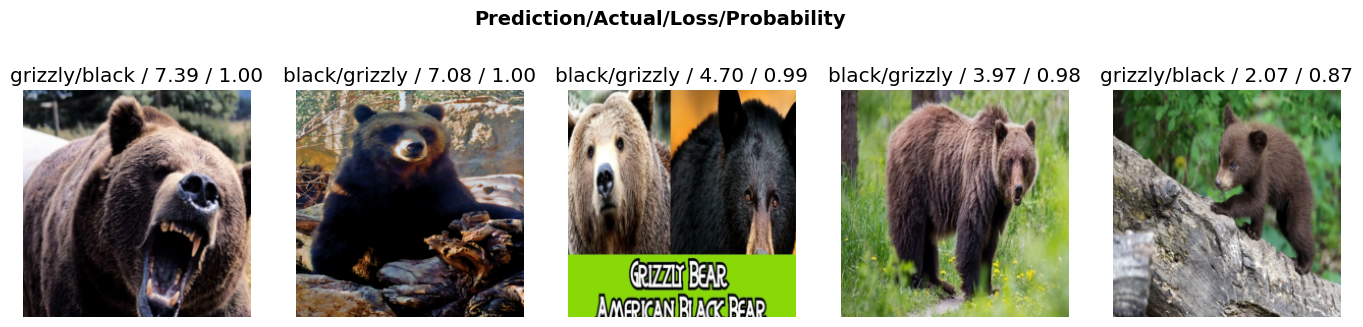

In [26]:
interp.plot_top_losses(5, nrows=1,figsize=(17,4))


In [27]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [28]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [29]:
learn.export()

In [30]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [31]:
learn_inf=load_learner(path/'export.pkl')

In [32]:
learn_inf.predict('image/grizzly.jpg')

('grizzly', tensor(1), tensor([2.0640e-02, 9.7925e-01, 1.0837e-04]))

In [33]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [34]:
from ipywidgets import widgets

In [35]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [36]:
btn_upload = SimpleNamespace(data = ['image/grizzly.jpg'])

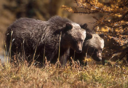

In [37]:
img = PILImage.create(btn_upload.data[-1])
img.to_thumb(128,128)

In [38]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [39]:
pred,pred_idx,probs = learn_inf.predict(img)

In [40]:
pip install --upgrade ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.5 MB/s eta 0:00:0000:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.4
    Uninstalling widgetsnbextension-3.6.4:
      Successfully uninstalled widgetsnbextension-3.6.4
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastbook 0.0.29 requires ipywidgets<8, but you have ipywidgets 8.1.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [41]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9793')

In [42]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [43]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [45]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your bear!'), btn_upload, btn_run, out_pl, lbl_pred])

In [46]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.0 MB/s eta 0:00:0000:01
Config option `kernel_spec_manager_class` not recognized by `EnableServerExtensionApp`.
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.4.3 OK
